In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats

In [2]:
DF_anime = pd.read_csv('Anime.csv', sep = ',')

## 0. Подготовка датасета

In [3]:
DF_anime

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21455,45064,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo,Unknown,小公主艾薇拉与神秘王国,Princess and the Kingdom,Unknown,Movie,1.0,Finished Airing,"May 12, 2018",...,Unknown,Kids,78.0,G - All Ages,NaN,NaN,160892.0,21487,7,0
21456,45065,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2,Unknown,小公主艾薇拉与神秘王国2,Avera and the Mystical Kingdom 2,Unknown,Movie,1.0,Finished Airing,"Aug 22, 2020",...,Unknown,Kids,80.0,G - All Ages,NaN,NaN,160902.0,21488,6,0
21457,45059,Yongzhe Chuang Mo Cheng,Unknown,勇者闯魔城,Brave City,Unknown,Movie,1.0,Finished Airing,"Mar 16, 2018",...,Unknown,Unknown,80.0,G - All Ages,NaN,NaN,164032.0,21489,6,0
21458,45063,Yu Shen Chuan: Wangzhe Shaonian,Unknown,禹神传之王者少年,The Juvenile of King Yu,Unknown,Movie,1.0,Finished Airing,"Aug 15, 2018",...,Unknown,Unknown,90.0,G - All Ages,NaN,NaN,164462.0,21490,6,0


In [4]:
DF_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

Удаляем ненужные колонки с излишней или неинтерпретируемой информацией

In [5]:
DF_anime = DF_anime.drop(columns = ['ID', 'Synonyms', 'Japanese', 'Synopsis', 'Start_Aired', 'End_Aired', 'Broadcast', 
                                    'Producers', 'Licensors', 'Ranked', 'Type'], axis = 1) 

Заменил значение "Unknown" для того, чтобы в следующем шаге было удобнее разнести корректные строки по 2-м столбцам и удалить лишние значения

In [6]:
DF_anime.loc[(DF_anime.Premiered == 'Unknown'), 'Premiered'] = 'Unknown Unknown'

Разнёс год и время года по двум разным столбцам

In [7]:
DF_anime['Premiered_Month'], DF_anime['Premiered_Year'] = DF_anime['Premiered'].str.split(' ', 1).str

C:\Users\123\AppData\Local\Temp\ipykernel_6624\1645054471.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  DF_anime['Premiered_Month'], DF_anime['Premiered_Year'] = DF_anime['Premiered'].str.split(' ', 1).str


In [8]:
DF_anime[['Premiered', 'Premiered_Month', 'Premiered_Year']]

,Premiered,Premiered_Month,Premiered_Year
0,Spring 2013,Spring,2013
1,Fall 2006,Fall,2006
2,Spring 2009,Spring,2009
3,Fall 2015,Fall,2015
4,Summer 2012,Summer,2012
...,...,...,...
21455,Unknown Unknown,Unknown,Unknown
21456,Unknown Unknown,Unknown,Unknown
21457,Unknown Unknown,Unknown,Unknown
21458,Unknown Unknown,Unknown,Unknown


Удалил лишнюю строчку

In [9]:
DF_anime = DF_anime.drop(columns = ['Premiered'], axis = 1) 

In [10]:
DF_anime = DF_anime.dropna()

Дополнительно очищаю датасет от пропущенных значений, которые не выражены в виде NaN

In [11]:
DF_anime = DF_anime[(DF_anime.Episodes != 'Unknown') & (DF_anime.Status != 'Unknown') 
                    & (DF_anime.Studios != 'Unknown') 
                    & (DF_anime.Source != 'Unknown') & (DF_anime.Genres != 'Unknown') & (DF_anime.Themes != 'Unknown') 
                    & (DF_anime.Demographics != 'Unknown') & (DF_anime.Duration_Minutes != 'Unknown') 
                    & (DF_anime.Rating != 'Unknown') & (DF_anime.Score != 'Unknown') & (DF_anime.Scored_Users != 'Unknown') 
                    & (DF_anime.Popularity != 'Unknown') & (DF_anime.Members != 'Unknown') & (DF_anime.Favorites != 'Unknown') 
                    & (DF_anime.Premiered_Month != 'Unknown') & (DF_anime.Premiered_Year != 'Unknown')]

In [12]:
DF_anime = DF_anime.sort_values(by = ['Popularity'], ascending = True)

Далее - создаю список уникальных жанров, имеющихся в датасете

In [13]:
genres_anime = DF_anime['Genres'].tolist()

In [14]:
genres_anime_data = ', '.join(genres_anime)

In [15]:
genres_anime_data = genres_anime_data.replace(',', '')

In [16]:
list_genres = genres_anime_data.split()

In [17]:
list_genres

['Action',
 'Drama',
 'Supernatural',
 'Suspense',
 'Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Comedy',
 'Action',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Fantasy',
 'Horror',
 'Action',
 'Fantasy',
 'Action',
 'Drama',
 'Action',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Drama',
 'Drama',
 'Romance',
 'Action',
 'Fantasy',
 'Action',
 'Fantasy',
 'Action',
 'Action',
 'Drama',
 'Action',
 'Fantasy',
 'Mystery',
 'Action',
 'Supernatural',
 'Suspense',
 'Action',
 'Comedy',
 'Action',
 'Fantasy',
 'Sports',
 'Mystery',
 'Sci-Fi',
 'Suspense',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Drama',
 'Action',
 'Fantasy',
 'Horror',
 'Gourmet',
 'Ecchi',
 'Action',
 'Adventure',
 'Comedy',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Adventure',
 'Supernatural',
 'Action',
 'Drama',
 'Horror',
 'Romance',
 'Supernatural',
 'Action',
 'Horror',
 'Supernatural',
 'Ecchi',
 'Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Fantasy',
 'Dra

In [18]:
list_genres_unique = set(list_genres)
list_genres_unique = list(list_genres_unique)

Подредактировал список - Slice of Life случайно разбился на три отдельных элемента по пробелу

In [19]:
for i in range(len(list_genres_unique)):
    if list_genres_unique[i] == 'Slice':
        list_genres_unique[i] = 'Slice of Life'

list_genres_unique.remove('of')
list_genres_unique.remove('Life')
        
list_genres_unique

['Ecchi',
 'Supernatural',
 'Girls',
 'Sci-Fi',
 'Action',
 'Sports',
 'Slice of Life',
 'Fantasy',
 'Romance',
 'Gourmet',
 'Suspense',
 'Adventure',
 'Mystery',
 'Love',
 'Horror',
 'Comedy',
 'Drama',
 'Boys']

In [20]:
DF_anime

,Title,English,Episodes,Status,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Popularity,Members,Favorites,Premiered_Month,Premiered_Year
0,Shingeki no Kyojin,Attack on Titan,25.0,Finished Airing,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1,3524109,155695,Spring,2013
1,Death Note,Death Note,37.0,Finished Airing,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,2,3504535,159701,Fall,2006
2,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,64.0,Finished Airing,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,3,2978455,207772,Spring,2009
3,One Punch Man,One Punch Man,12.0,Finished Airing,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,4,2879907,59651,Fall,2015
5,Boku no Hero Academia,My Hero Academia,13.0,Finished Airing,Bones,Manga,Action,"School, Super Power",Shounen,24.0,PG-13 - Teens 13 or older,7.921,871325.0,6,2708684,52169,Spring,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,Super Zugan,21.0,Finished Airing,Studio Deen,Manga,Comedy,Strategy Game,Shounen,25.0,PG-13 - Teens 13 or older,6.341,133.0,13089,673,3,Fall,1992
13131,Doctor Chichibuyama,Unknown,2.0,Finished Airing,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,29.0,R+ - Mild Nudity,5.521,144.0,13145,662,1,Spring,1988
13452,Hei Mao Jing Zhang,Black Cat Detective,5.0,Finished Airing,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,18.0,PG - Children,5.551,223.0,13469,592,0,Winter,1984
14660,Hei Mao Jing Zhang (1992),Black Cat Detective,12.0,Finished Airing,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,7.0,PG - Children,5.721,119.0,14681,406,0,Winter,1992


## 1. Создание переменных

In [21]:
premiered_year_list = DF_anime['Premiered_Year']
print('Самый ранний год выпуска -', premiered_year_list.min(), '/', 'Самый поздний год выпуска -', premiered_year_list.max())

Самый ранний год выпуска - 1963 / Самый поздний год выпуска - 2022


Разбил все года по десятилетиям

In [22]:
def years_funct(year):
    if year in range(1960, 1970):
        return '60-е'
    elif year in range(1970, 1980):
        return '70-е'
    elif year in range(1980, 1990):
        return '80-е'
    elif year in range(1990, 2000):
        return '90-е'
    elif year in range(2000, 2010):
        return '00-е'
    elif year in range(2010, 2020):
        return '10-е'
    else:
        return '20-е'

In [23]:
DF_anime = DF_anime.astype({'Premiered_Year': 'int64'})
DF_anime = DF_anime.astype({'Scored_Users': 'int64'})

In [24]:
DF_anime['Time Period'] = DF_anime['Premiered_Year'].apply(years_funct)

In [25]:
list_demo_anime = list(set(DF_anime['Demographics'].tolist()))
list_demo_anime

['Seinen',
 'Kids',
 'Josei',
 'Shoujo',
 'Kids, Shounen',
 'Kids, Shoujo',
 'Shounen']

Создал список уникальных демографических описаний, которые есть в датасете:

Kids - м/ж, до 12\
Shounen - м, 12-18\
Kids, Shoujo - ж, до 12 + 12-18\
Josei- ж, 18+\
Shoujo - ж, 12-18\
Seinen - м, 18+\
Kids, Shounen - м, до 12 + 12-18\

Далее создал список уникальных возрастных рейтингов, которые есть в датасете

In [26]:
list_ratings_anime = list(set(DF_anime['Rating'].tolist()))
list_ratings_anime

['R+ - Mild Nudity',
 'G - All Ages',
 'PG - Children',
 'None',
 'R - 17+ (violence & profanity)',
 'PG-13 - Teens 13 or older']

Дропнул один пропущенный миссинг

In [27]:
print(DF_anime.shape)
DF_anime = DF_anime[(DF_anime.Rating != 'None')]
print(DF_anime.shape)

(1168, 19)
(1167, 19)


In [28]:
score_list = DF_anime['Score']
print('Низшая оценка -', score_list.min(), '/', 'Высшая оценка -', score_list.max())

Низшая оценка - 4.711 / Высшая оценка - 9.131


In [29]:
otsenki = []
for i in score_list:
    otsenki.append(round(i,1))
    
otsenki

[8.5,
 8.6,
 9.1,
 8.5,
 7.9,
 8.0,
 7.8,
 8.5,
 8.5,
 8.1,
 8.2,
 8.6,
 8.7,
 8.7,
 8.0,
 8.1,
 9.1,
 7.5,
 8.3,
 7.4,
 8.1,
 7.5,
 8.5,
 8.5,
 8.4,
 8.8,
 7.0,
 8.2,
 7.9,
 8.3,
 8.4,
 7.5,
 7.9,
 7.5,
 7.1,
 8.1,
 8.2,
 7.3,
 8.6,
 8.5,
 7.5,
 7.8,
 8.7,
 7.2,
 8.0,
 8.7,
 8.2,
 8.2,
 8.1,
 7.7,
 7.6,
 8.8,
 8.2,
 8.1,
 6.4,
 8.2,
 8.8,
 8.1,
 8.9,
 7.5,
 9.0,
 7.4,
 8.4,
 8.8,
 8.0,
 7.6,
 8.0,
 8.8,
 8.0,
 8.6,
 8.2,
 7.6,
 8.0,
 5.3,
 7.7,
 8.5,
 8.4,
 7.3,
 7.6,
 8.2,
 7.1,
 6.7,
 8.3,
 6.4,
 8.7,
 7.9,
 7.6,
 8.7,
 8.5,
 7.4,
 8.2,
 7.9,
 7.6,
 7.6,
 7.6,
 8.0,
 8.2,
 7.4,
 7.2,
 7.0,
 8.5,
 8.3,
 8.2,
 7.5,
 7.6,
 6.7,
 8.0,
 9.1,
 8.0,
 7.3,
 7.4,
 6.8,
 7.1,
 7.8,
 8.4,
 7.2,
 8.5,
 7.4,
 7.6,
 8.1,
 7.0,
 7.7,
 8.1,
 8.2,
 6.5,
 7.7,
 8.5,
 6.9,
 7.9,
 8.4,
 8.5,
 7.9,
 9.1,
 7.4,
 7.8,
 6.6,
 7.4,
 7.7,
 7.2,
 8.1,
 8.2,
 7.9,
 7.7,
 7.9,
 8.8,
 8.3,
 9.1,
 8.4,
 7.3,
 6.3,
 8.2,
 8.4,
 8.1,
 7.3,
 8.2,
 7.6,
 8.3,
 6.8,
 7.3,
 7.1,
 8.2,
 7.5,
 6.6,
 8.0,
 8.2,
 7.9,
 7.0

Ввёл через новый список в датасет округлённые до десятых оценки аниме

In [30]:
DF_anime['Оценки'] = otsenki

Далее - присваиваю категории оценкам

In [31]:
scores = np.array(otsenki)
cond = [9 <= scores, 7 <= scores, 5 <= scores, ]
marks = ['Отлично', 'Хорошо', 'Посредственно', ]
new_scores = np.select(cond, marks, default='Плохо')
new_scores = new_scores.tolist()
new_scores

['Хорошо',
 'Хорошо',
 'Отлично',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Отлично',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Посредственно',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Отлично',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Посредственно',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Посредственно',
 'Хорошо',
 'Посредственно',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 'Хорошо',
 

In [32]:
DF_anime['Оценки_Категории'] = new_scores

Проверка - всё верно, категории присвоились корректно

In [33]:
DF_anime.groupby(['Оценки_Категории', 'Оценки']).size()

Оценки_Категории  Оценки
Отлично           9.0        4
                  9.1        5
Плохо             4.7        1
                  4.8        1
Посредственно     5.2        2
                  5.3        1
                  5.4        2
                  5.5        7
                  5.6        3
                  5.7        3
                  5.8        9
                  5.9        6
                  6.0       17
                  6.1       13
                  6.2       19
                  6.3       27
                  6.4       37
                  6.5       40
                  6.6       49
                  6.7       49
                  6.8       45
                  6.9       49
Хорошо            7.0       63
                  7.1       63
                  7.2       86
                  7.3       63
                  7.4       64
                  7.5       59
                  7.6       56
                  7.7       43
                  7.8       41
              

In [34]:
# Ранее пытался заставить работать через функцию - не вышло

# def score_funct(score):
#     if score in np.arange(4.0, 5.0, 0.1):
#         return 'Плохо'
#     elif score in np.arange(5.0, 7.0, 0.1):
#         return 'Посредственно'
#     elif score in np.arange(7.0, 9.0, 0.1):
#         return 'Хорошо'
#     else:
#         return 'Отлично'
# 
# DF_anime['Категории оценок'] = DF_anime['Оценки'].apply(score_funct)

In [35]:
DF_anime['Оценки_Категории'] = pd.Categorical(DF_anime['Оценки_Категории'])
DF_anime['Rating'] = pd.Categorical(DF_anime['Rating'])
DF_anime['Demographics'] = pd.Categorical(DF_anime['Demographics']) 
DF_anime['Time Period'] = pd.Categorical(DF_anime['Time Period']) 

In [36]:
DF_anime.groupby('Premiered_Year')['Premiered_Month'].value_counts()

Premiered_Year  Premiered_Month
1963            Fall                1
                Winter              1
1964            Summer              1
1967            Spring              2
                Winter              1
                                   ..
2021            Fall                9
                Summer              8
2022            Spring             12
                Summer             10
                Winter             10
Name: Premiered_Month, Length: 182, dtype: int64

In [37]:
DF_anime.groupby(['Premiered_Year', 'Premiered_Month'])['Rating'].value_counts()

Premiered_Year  Premiered_Month                                
1963            Fall             G - All Ages                      1
                                 PG - Children                     0
                                 PG-13 - Teens 13 or older         0
                                 R - 17+ (violence & profanity)    0
                                 R+ - Mild Nudity                  0
                                                                  ..
2022            Winter           PG-13 - Teens 13 or older         6
                                 R - 17+ (violence & profanity)    4
                                 G - All Ages                      0
                                 PG - Children                     0
                                 R+ - Mild Nudity                  0
Name: Rating, Length: 910, dtype: int64

In [38]:
print(DF_anime['Rating'].value_counts())
print('')
print(DF_anime['Premiered_Year'].value_counts())

PG-13 - Teens 13 or older         727
R - 17+ (violence & profanity)    169
G - All Ages                      118
PG - Children                      84
R+ - Mild Nudity                   69
Name: Rating, dtype: int64

2012    60
2019    59
2016    58
2018    54
2015    53
2014    52
2006    49
2021    46
2017    46
2013    44
2004    44
2011    43
2008    39
2009    38
2020    37
2007    35
2010    35
2003    34
2022    32
2005    30
2002    29
2001    20
1998    20
2000    19
1996    17
1999    15
1997    13
1983    12
1994    11
1984     9
1995     9
1991     8
1992     8
1977     7
1985     7
1986     7
1975     6
1981     6
1978     6
1993     5
1990     5
1989     4
1973     4
1988     4
1987     4
1979     3
1967     3
1980     3
1963     2
1970     2
1982     2
1974     2
1968     2
1976     2
1971     1
1969     1
1964     1
Name: Premiered_Year, dtype: int64


Проверка - всё верно

In [39]:
print(DF_anime['Rating'].value_counts().sum())
print(DF_anime['Premiered_Year'].value_counts().sum())
print(DF_anime.groupby(['Premiered_Year', 'Premiered_Month'])['Rating'].value_counts().sum())
print(DF_anime.shape)

1167
1167
1167
(1167, 21)


## 2. Базовая визуализация

In [40]:
DF_anime

,Title,English,Episodes,Status,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,...,Score,Scored_Users,Popularity,Members,Favorites,Premiered_Month,Premiered_Year,Time Period,Оценки,Оценки_Категории
0,Shingeki no Kyojin,Attack on Titan,25.0,Finished Airing,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,...,8.531,519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо
1,Death Note,Death Note,37.0,Finished Airing,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,...,8.621,485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо
2,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,64.0,Finished Airing,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,...,9.131,900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично
3,One Punch Man,One Punch Man,12.0,Finished Airing,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,...,8.511,19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо
5,Boku no Hero Academia,My Hero Academia,13.0,Finished Airing,Bones,Manga,Action,"School, Super Power",Shounen,24.0,...,7.921,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,Super Zugan,21.0,Finished Airing,Studio Deen,Manga,Comedy,Strategy Game,Shounen,25.0,...,6.341,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно
13131,Doctor Chichibuyama,Unknown,2.0,Finished Airing,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,29.0,...,5.521,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно
13452,Hei Mao Jing Zhang,Black Cat Detective,5.0,Finished Airing,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,18.0,...,5.551,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно
14660,Hei Mao Jing Zhang (1992),Black Cat Detective,12.0,Finished Airing,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,7.0,...,5.721,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно


In [41]:
DF_anime.rename(columns = {'Title' : 'Название',
                'English' : 'Название_(англ.)', 
                'Episodes' : 'Кол-во_эп.', 
                'Status' : 'Статус', 
                'Studios' : 'Студия', 
                'Source' : 'Источник', 
                'Genres' : 'Жанры', 
                'Themes' : 'Темы', 
                'Demographics' : 'Демография', 
                'Duration_Minutes' : 'Длительность', 
                'Rating' : 'Рейтинг', 
                'Score' : 'Оценка_(перв.)', 
                'Scored_Users' : 'Оценивш._польз-ли', 
                'Popularity' : 'Популярность', 
                'Members' : 'Члены_сообщества', 
                'Favorites' : 'В_избранных', 
                'Premiered_Month' : 'Премьера_(месяц)', 
                'Premiered_Year' : 'Премьера_(год)', 
                'Оценки' : 'Оценка',
                'Time Period' : 'Врем_период', 
                'Оценки_Категории' : 'Оценка_(категория)'}, inplace = True)

In [42]:
DF_anime = DF_anime.drop(columns = ['Статус', 'Длительность', 'Оценка_(перв.)', 'Название_(англ.)'], axis = 1) 

Больше всего тайтлов на данный момент вышло в 2010-х годах; виден постепенный рост кол-ва релизов аниме с 60-х. \
В 2000-е был особенно заметен скачок активности студий.

<AxesSubplot:>

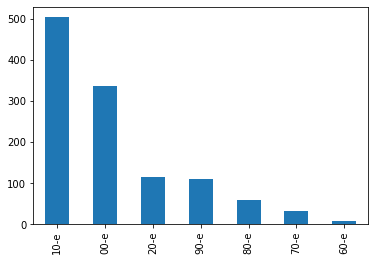

In [43]:
DF_anime['Врем_период'].value_counts().plot(kind = 'bar')

Тот же график, только через matplotlib

<BarContainer object of 7 artists>

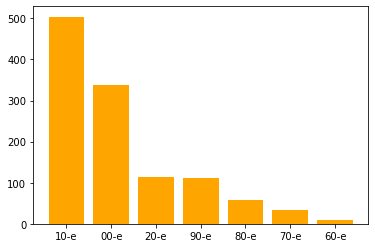

In [44]:
time_period = DF_anime['Врем_период'].value_counts()

plt.bar(time_period.index, time_period, color = 'orange')

Ещё один график, только больше

<BarContainer object of 7 artists>

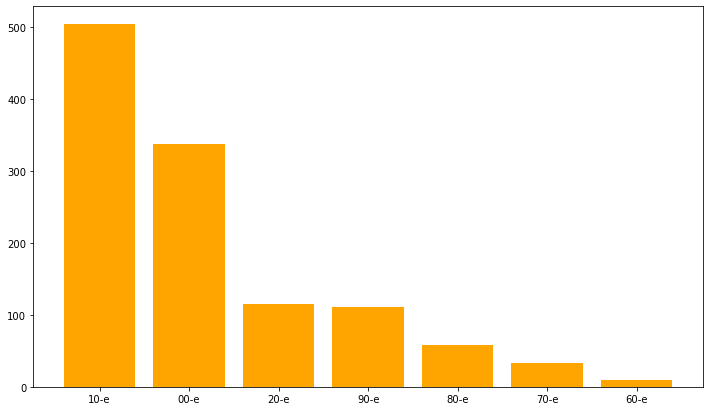

In [45]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.bar(time_period.index, time_period, color = 'orange')

Видно, что практически во все года кол-во хороших аниме превышает кол-во посредственных. Исключение - 60-е.\
Также заметно, что в 2010-е сравнительно боллььшое количество высокооценённых аниме в категории "Отлично" (т.е. > 9 баллов).

<AxesSubplot:xlabel='Врем_период'>

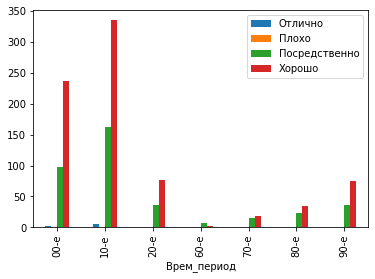

In [46]:
DF_anime.groupby('Врем_период')['Оценка_(категория)'].value_counts().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Врем_период'>

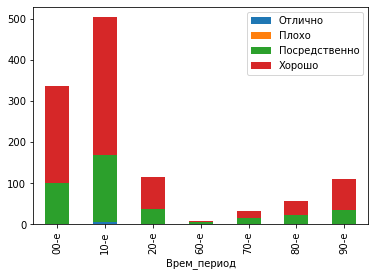

In [47]:
DF_anime.groupby('Врем_период')['Оценка_(категория)'].value_counts().unstack().plot(kind = 'bar', stacked = True)

Основной жанр - cёнэн

<AxesSubplot:>

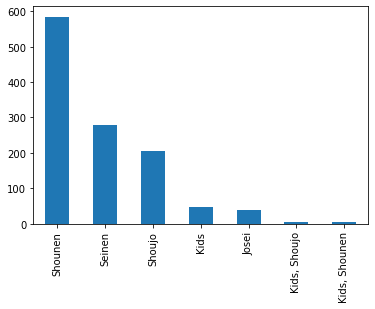

In [48]:
DF_anime['Демография'].value_counts().plot(kind = 'bar')

Большинство контента рассчитано на подростковую ЦА

<AxesSubplot:>

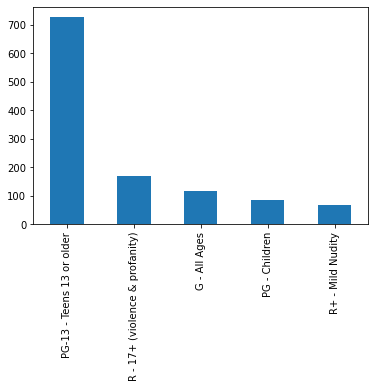

In [49]:
DF_anime['Рейтинг'].value_counts().plot(kind = 'bar')

Подавляющее кол-во аниме - экранизация манги

<AxesSubplot:>

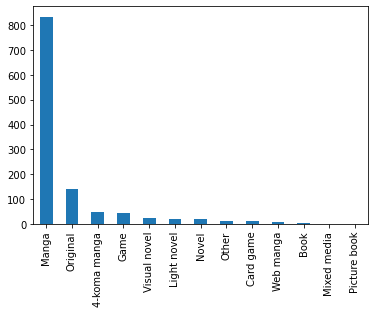

In [50]:
DF_anime['Источник'].value_counts().plot(kind = 'bar')

Практически всё время основное время года, когда выходят аниме - весна. Исключение - 20-е и 70-е годы.

<AxesSubplot:xlabel='Врем_период'>

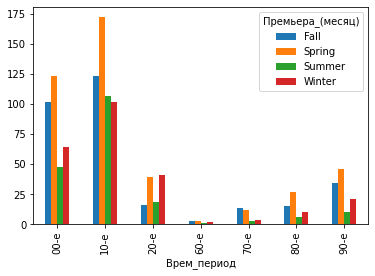

In [51]:
DF_anime.groupby('Врем_период')['Премьера_(месяц)'].value_counts().unstack().plot(kind = 'bar')

Написал функцию для присвоения значения пола направленности жанров

In [52]:
def sex(input_data):
    if input_data == 'Kids':
        return 'All'
    elif input_data == 'Shounen':
        return 'Male'
    elif input_data == 'Kids, Shoujo':
        return 'Female'
    elif input_data == 'Josei':
        return 'Female'
    elif input_data == 'Shoujo':
        return 'Female'
    elif input_data == 'Seinen':
        return 'Male'
    else:
        return 'Male'

Сгруппировал по полу.

In [53]:
DF_anime['Пол_ЦА'] = DF_anime['Демография'].apply(sex)

In [54]:
sex = DF_anime['Пол_ЦА'].value_counts()

Подавляющее количество контента рассчитано на мужскую аудиторию.

<AxesSubplot:ylabel='Пол_ЦА'>

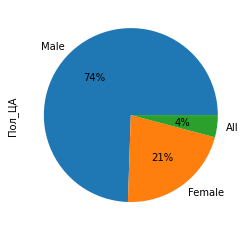

In [55]:
sex.plot.pie(autopct = '%1.0f%%')

## 3. Меры тенденций

Топ-10 студий + объединений студий по оценке пользователей (среднее значение).

In [56]:
Studios = pd.DataFrame(DF_anime.groupby('Студия')['Оценка'].mean())
Studios = Studios.sort_values(by='Оценка', ascending = False)
Studios.head(10)

,Оценка
Студия,
"Wit Studio, CloverWorks",8.80
"Pierrot, Studio Signpost",8.80
"Madhouse, MAPPA",8.60
Shuka,8.60
Kyoto Animation,8.50
"J.C.Staff, Egg Firm",8.40
"Gallop, Studio Deen",8.30
"Tezuka Productions, MAPPA",8.25
Telescreen,8.20


Топ-10 студий + объединений студий по оценке пользователей (медианное значение).

In [57]:
Studios = pd.DataFrame(DF_anime.groupby('Студия')['Оценка'].median())
Studios = Studios.sort_values(by='Оценка', ascending = False)
Studios.head(10)

,Оценка
Студия,
"Wit Studio, CloverWorks",8.80
"Pierrot, Studio Signpost",8.80
Shuka,8.60
"Madhouse, MAPPA",8.60
Wit Studio,8.50
Kyoto Animation,8.50
ufotable,8.40
"J.C.Staff, Egg Firm",8.40
"Gallop, Studio Deen",8.30


Можно заметить, что наибольшие средние и медианные оценки наблюдаются у аниме производства 10-х и 20-х годов, равно как и наибольшее количество членов сообщества, что говорит об их сравнительной популярности в разрезе всех временных периодов.

In [58]:
DF_anime.pivot_table(index = 'Врем_период',
                    values = ['Оценка', 'Члены_сообщества'],
                    aggfunc=['mean', 'median'])

mean                  median                 
               Оценка Члены_сообщества Оценка Члены_сообщества
Врем_период                                                   
00-е         7.263205    156522.151335    7.2            54937
10-е         7.301786    324548.478175    7.3           143842
20-е         7.358261    269679.939130    7.3           131032
60-е         6.666667      6144.888889    6.7             4637
70-е         7.009091     15765.666667    7.0             5275
80-е         7.055172     51756.327586    7.1             5991
90-е         7.209910     75082.081081    7.1            14182

Создана отдельный датафрейм под вычисление моды.



In [59]:
DF_anime_cut = DF_anime.drop(columns = ['Название', 'Кол-во_эп.', 'Студия', 'Источник', 'Жанры', 'Темы', 'Демография', 'Рейтинг', 
                                    'Оценивш._польз-ли', 'Популярность', 'Члены_сообщества', 'В_избранных', 'Премьера_(год)'], 
                       axis = 1) 

Практически во все временные периоды модальная оценка аниме находится в пределах "Хорошо"; исключение - 60-е, где чаще всего встречались оценки категории "Посредственно".



In [60]:
DF_anime_cut.groupby('Врем_период')['Оценка_(категория)'].agg(lambda x: x.value_counts().index[0])

Врем_период
00-е           Хорошо
10-е           Хорошо
20-е           Хорошо
60-е    Посредственно
70-е           Хорошо
80-е           Хорошо
90-е           Хорошо
Name: Оценка_(категория), dtype: object

In [61]:
DF_anime

,Название,Кол-во_эп.,Студия,Источник,Жанры,Темы,Демография,Рейтинг,Оценивш._польз-ли,Популярность,Члены_сообщества,В_избранных,Премьера_(месяц),Премьера_(год),Врем_период,Оценка,Оценка_(категория),Пол_ЦА
0,Shingeki no Kyojin,25.0,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо,Male
1,Death Note,37.0,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо,Male
2,Fullmetal Alchemist: Brotherhood,64.0,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично,Male
3,One Punch Man,12.0,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо,Male
5,Boku no Hero Academia,13.0,Bones,Manga,Action,"School, Super Power",Shounen,PG-13 - Teens 13 or older,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,21.0,Studio Deen,Manga,Comedy,Strategy Game,Shounen,PG-13 - Teens 13 or older,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно,Male
13131,Doctor Chichibuyama,2.0,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,R+ - Mild Nudity,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно,Male
13452,Hei Mao Jing Zhang,5.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно,All
14660,Hei Mao Jing Zhang (1992),12.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно,All


Можно заметить, что среди всех аниме основной упор идёт на мужчин, а наиболее частый сезон для выпуска тайтлов - весна. 



In [62]:
print(DF_anime_cut['Пол_ЦА'].mode())
print(DF_anime_cut['Премьера_(месяц)'].mode())

0    Male
Name: Пол_ЦА, dtype: object
0    Spring
Name: Премьера_(месяц), dtype: object


In [63]:
np.where((DF_anime['Оценка'] >= 8.0) & (DF_anime['Демография'] == 'Shounen'))

(array([  0,   1,   2,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  20,  22,  23,  25,  27,  29,  35,  36,  38,  39,  46,  47,
         48,  51,  52,  53,  56,  57,  58,  60,  62,  63,  64,  68,  69,
         70,  75,  76,  79,  87,  95, 100, 101, 102, 106, 108, 116, 119,
        123, 129, 132, 139, 144, 146, 147, 156, 183, 199, 203, 205, 206,
        212, 219, 220, 229, 232, 236, 238, 241, 246, 252, 256, 262, 265,
        275, 285, 299, 300, 316, 329, 334, 348, 350, 353, 371, 393, 396,
        404, 406, 422, 437, 441, 443, 453, 461, 463, 520, 533, 542, 559,
        560, 576, 597, 600, 605, 615, 628, 685, 732, 775, 846], dtype=int64),)

Сделал лист для дальнейшего подсчёта кол-ва вышедших за годы аниме



In [64]:
dlya_vybrosov = []
for i in range (0,1167):
    dlya_vybrosov.append(1)
    
print(len(dlya_vybrosov))

1167


In [65]:
DF_anime_cut

,Премьера_(месяц),Врем_период,Оценка,Оценка_(категория),Пол_ЦА
0,Spring,10-е,8.5,Хорошо,Male
1,Fall,00-е,8.6,Хорошо,Male
2,Spring,00-е,9.1,Отлично,Male
3,Fall,10-е,8.5,Хорошо,Male
5,Spring,10-е,7.9,Хорошо,Male
...,...,...,...,...,...
13075,Fall,90-е,6.3,Посредственно,Male
13131,Spring,80-е,5.5,Посредственно,Male
13452,Winter,80-е,5.6,Посредственно,All
14660,Winter,90-е,5.7,Посредственно,All


Сделал отдельный датасет для подсчёта кол-ва вышедших за годы аниме



In [66]:
DF_anime_vybr = DF_anime
DF_anime_vybr['для_выбросов'] = dlya_vybrosov
DF_anime_vybr

,Название,Кол-во_эп.,Студия,Источник,Жанры,Темы,Демография,Рейтинг,Оценивш._польз-ли,Популярность,Члены_сообщества,В_избранных,Премьера_(месяц),Премьера_(год),Врем_период,Оценка,Оценка_(категория),Пол_ЦА,для_выбросов
0,Shingeki no Kyojin,25.0,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо,Male,1
1,Death Note,37.0,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо,Male,1
2,Fullmetal Alchemist: Brotherhood,64.0,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично,Male,1
3,One Punch Man,12.0,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо,Male,1
5,Boku no Hero Academia,13.0,Bones,Manga,Action,"School, Super Power",Shounen,PG-13 - Teens 13 or older,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,21.0,Studio Deen,Manga,Comedy,Strategy Game,Shounen,PG-13 - Teens 13 or older,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно,Male,1
13131,Doctor Chichibuyama,2.0,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,R+ - Mild Nudity,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно,Male,1
13452,Hei Mao Jing Zhang,5.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно,All,1
14660,Hei Mao Jing Zhang (1992),12.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно,All,1


In [67]:
DF_anime

,Название,Кол-во_эп.,Студия,Источник,Жанры,Темы,Демография,Рейтинг,Оценивш._польз-ли,Популярность,Члены_сообщества,В_избранных,Премьера_(месяц),Премьера_(год),Врем_период,Оценка,Оценка_(категория),Пол_ЦА,для_выбросов
0,Shingeki no Kyojin,25.0,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо,Male,1
1,Death Note,37.0,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо,Male,1
2,Fullmetal Alchemist: Brotherhood,64.0,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично,Male,1
3,One Punch Man,12.0,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо,Male,1
5,Boku no Hero Academia,13.0,Bones,Manga,Action,"School, Super Power",Shounen,PG-13 - Teens 13 or older,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,21.0,Studio Deen,Manga,Comedy,Strategy Game,Shounen,PG-13 - Teens 13 or older,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно,Male,1
13131,Doctor Chichibuyama,2.0,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,R+ - Mild Nudity,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно,Male,1
13452,Hei Mao Jing Zhang,5.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно,All,1
14660,Hei Mao Jing Zhang (1992),12.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно,All,1


In [68]:
print(DF_anime_vybr.groupby('Врем_период')['для_выбросов'].sum())
print('')
print('Проверка на соответствие общему кол-ву строк:', DF_anime_vybr.groupby('Врем_период')['для_выбросов'].value_counts().sum())

Врем_период
00-е    337
10-е    504
20-е    115
60-е      9
70-е     33
80-е     58
90-е    111
Name: для_выбросов, dtype: int64

Проверка на соответствие общему кол-ву строк: 1167


Сделал отдельный датасет для визуализации и подсчёта выбросов по датам выхода аниме



In [69]:
DF_anime_vybr_1 = pd.DataFrame(DF_anime_vybr.groupby('Врем_период')['для_выбросов'].sum().reset_index(name='count'))
DF_anime_vybr_1.rename(columns = {'count' : 'Количество_тайтлов'}, inplace = True)
DF_anime_vybr_1.reset_index(drop = True, inplace = True)
DF_anime_vybr_1

,Врем_период,Количество_тайтлов
0,00-е,337
1,10-е,504
2,20-е,115
3,60-е,9
4,70-е,33
5,80-е,58
6,90-е,111


Создал тот же датафрейм, только с индексами по годам



In [70]:
DF_anime_vybr_2 = pd.DataFrame(DF_anime_vybr.groupby('Врем_период')['для_выбросов'].sum())

Построил график для наглядности



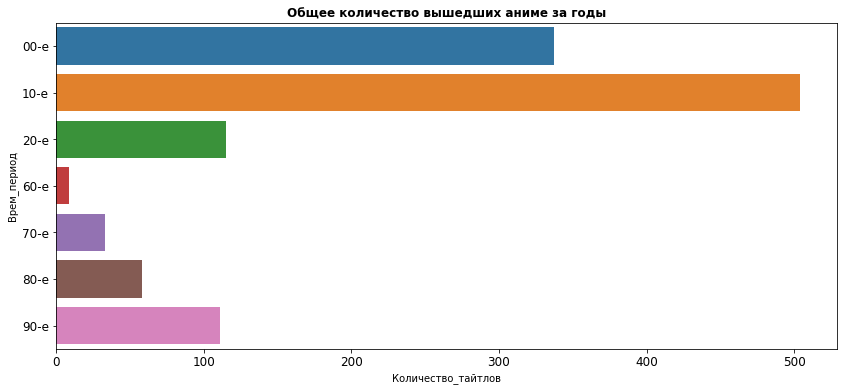

In [71]:
plt.figure(figsize = (14,6))
plt.title('Общее количество вышедших аниме за годы', fontsize = 12, fontweight = 'bold')
sns.barplot(y = DF_anime_vybr_1.Врем_период, x = DF_anime_vybr_1.Количество_тайтлов, alpha = 1)
plt.tick_params(labelsize = 12)

In [72]:
DF_anime_vybr_2.rename(columns = {'для_выбросов' : 'Количество_тайтлов'}, inplace = True)

In [73]:
DF_anime_vybr_2.describe()

,Количество_тайтлов
count,7.000000
mean,166.714286
std,183.987965
min,9.000000
25%,45.500000
50%,111.000000
75%,226.000000
max,504.000000


In [74]:
DF_anime_vybr_2.describe()['Количество_тайтлов']

count      7.000000
mean     166.714286
std      183.987965
min        9.000000
25%       45.500000
50%      111.000000
75%      226.000000
max      504.000000
Name: Количество_тайтлов, dtype: float64

Подсчитали разницу квартилей



In [75]:
np.percentile(DF_anime_vybr_2['Количество_тайтлов'], 75) - np.percentile(DF_anime_vybr_2['Количество_тайтлов'], 25)

180.5

Подсчитали разницу квартилей, находим дисперсию и среднеквадратичное отклонение
 


In [76]:
anime_mean = DF_anime_vybr_2['Количество_тайтлов'].mean()
anime_mean_deviations = DF_anime_vybr_2['Количество_тайтлов'] - anime_mean
sq_anime_mean_deviations = anime_mean_deviations ** 2

variance_gen = sq_anime_mean_deviations.sum() / len(DF_anime_vybr_2)

s_k_otkl = np.sqrt(variance_gen)

print('Дисперсия =', variance_gen, 'Среднеквадратичное отклонение =', s_k_otkl)

Дисперсия = 29015.632653061224 Среднеквадратичное отклонение = 170.33975652519064


Нахождение дисперсии и среднеквадратичного отклонения при помощи функций Pandas:



In [77]:
print('Дисперсия =', DF_anime_vybr_2['Количество_тайтлов'].var(ddof = 0))
print('Среднеквадратичное отклонение =', DF_anime_vybr_2['Количество_тайтлов'].std(ddof = 0))

Дисперсия = 29015.632653061224
Среднеквадратичное отклонение = 170.33975652519064


Расчёт дисперсии и среднеквадратичного отклонения (для ген. совокупности); находим дисперсию и среднеквадратичное отклонение

In [78]:
anime_mean = DF_anime_vybr_2['Количество_тайтлов'].mean()
anime_mean_deviations = DF_anime_vybr_2['Количество_тайтлов'] - anime_mean
sq_anime_mean_deviations = anime_mean_deviations ** 2

variance_gen = sq_anime_mean_deviations.sum() / len(DF_anime_vybr_2) -1

s_k_otkl = np.sqrt(variance_gen)

print('Дисперсия =', variance_gen, 'Среднеквадратичное отклонение =', s_k_otkl)

Дисперсия = 29014.632653061224 Среднеквадратичное отклонение = 170.33682118984498


Аналогично можно применять данные функции и в пивотальных таблицах

In [79]:
def max_min_pivot(x):
    return x.max() - x.min()

DF_anime.pivot_table(index = 'Врем_период',
                    values = ['Оценка', 'Члены_сообщества'],
                    aggfunc=['var', 'std', max_min_pivot])

var                        std                   \
               Оценка Члены_сообщества    Оценка Члены_сообщества   
Врем_период                                                         
00-е         0.422809     1.279935e+11  0.650237    357761.761135   
10-е         0.568327     2.414667e+11  0.753875    491392.562122   
20-е         0.765962     1.231397e+11  0.875192    350912.686534   
60-е         0.150000     2.001268e+07  0.387298      4473.553186   
70-е         0.406477     6.491658e+08  0.637556     25478.732691   
80-е         0.407078     3.617506e+10  0.638027    190197.436525   
90-е         0.369265     2.296138e+10  0.607671    151530.125908   

            max_min_pivot                   
                   Оценка Члены_сообщества  
Врем_период                                 
00-е                  3.9          3503799  
10-е                  4.4          3523728  
20-е                  4.3          1980894  
60-е                  1.3            12981  
70-е                  2.4            93317  
80-е                  3.2          1119750  
90-е                  3.0           745162

In [80]:
DF_anime

,Название,Кол-во_эп.,Студия,Источник,Жанры,Темы,Демография,Рейтинг,Оценивш._польз-ли,Популярность,Члены_сообщества,В_избранных,Премьера_(месяц),Премьера_(год),Врем_период,Оценка,Оценка_(категория),Пол_ЦА,для_выбросов
0,Shingeki no Kyojin,25.0,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо,Male,1
1,Death Note,37.0,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо,Male,1
2,Fullmetal Alchemist: Brotherhood,64.0,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично,Male,1
3,One Punch Man,12.0,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо,Male,1
5,Boku no Hero Academia,13.0,Bones,Manga,Action,"School, Super Power",Shounen,PG-13 - Teens 13 or older,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,21.0,Studio Deen,Manga,Comedy,Strategy Game,Shounen,PG-13 - Teens 13 or older,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно,Male,1
13131,Doctor Chichibuyama,2.0,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,R+ - Mild Nudity,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно,Male,1
13452,Hei Mao Jing Zhang,5.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно,All,1
14660,Hei Mao Jing Zhang (1992),12.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно,All,1


Создал отдельный датасет для z-оценки

In [81]:
DF_anime_z = DF_anime[['Название', 'Демография', 'Врем_период', 'Оценка']]

In [82]:
DF_anime_z

,Название,Демография,Врем_период,Оценка
0,Shingeki no Kyojin,Shounen,10-е,8.5
1,Death Note,Shounen,00-е,8.6
2,Fullmetal Alchemist: Brotherhood,Shounen,00-е,9.1
3,One Punch Man,Seinen,10-е,8.5
5,Boku no Hero Academia,Shounen,10-е,7.9
...,...,...,...,...
13075,Super Zugan,Shounen,90-е,6.3
13131,Doctor Chichibuyama,Seinen,80-е,5.5
13452,Hei Mao Jing Zhang,Kids,80-е,5.6
14660,Hei Mao Jing Zhang (1992),Kids,90-е,5.7


<AxesSubplot:>

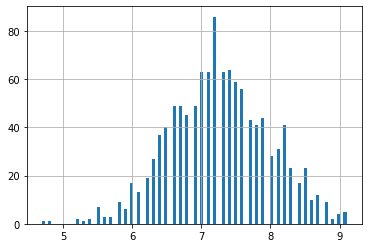

In [83]:
DF_anime_z['Оценка'].hist(bins = 100)

In [84]:
DF_anime_z

,Название,Демография,Врем_период,Оценка
0,Shingeki no Kyojin,Shounen,10-е,8.5
1,Death Note,Shounen,00-е,8.6
2,Fullmetal Alchemist: Brotherhood,Shounen,00-е,9.1
3,One Punch Man,Seinen,10-е,8.5
5,Boku no Hero Academia,Shounen,10-е,7.9
...,...,...,...,...
13075,Super Zugan,Shounen,90-е,6.3
13131,Doctor Chichibuyama,Seinen,80-е,5.5
13452,Hei Mao Jing Zhang,Kids,80-е,5.6
14660,Hei Mao Jing Zhang (1992),Kids,90-е,5.7


Отберём аниме для z-оценки внутри каждого из жанров. Немного упростим датафрейм, обозначив весь контент "G" как детский.


In [85]:
genres_list = list(DF_anime_z['Демография'])

In [86]:
print(list(set(genres_list)))

['Seinen', 'Kids', 'Josei', 'Shoujo', 'Kids, Shounen', 'Kids, Shoujo', 'Shounen']


In [87]:
for i in range(len(genres_list)):
    if genres_list[i] == 'Kids, Shoujo':
        genres_list[i] = 'Kids'
    elif genres_list[i] == 'Kids, Shounen':
        genres_list[i] = 'Kids'

print(len(genres_list))
print(list(set(genres_list)))

1167
['Seinen', 'Kids', 'Josei', 'Shoujo', 'Shounen']


In [88]:
DF_anime_z['Демография'] = genres_list

C:\Users\123\AppData\Local\Temp\ipykernel_6624\2907076638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_anime_z['Демография'] = genres_list


In [89]:
Shoujo = DF_anime_z[DF_anime_z['Демография'] == 'Shoujo']
Kids = DF_anime_z[DF_anime_z['Демография'] == 'Kids']
Shounen = DF_anime_z[DF_anime_z['Демография'] == 'Shounen']
Josei = DF_anime_z[DF_anime_z['Демография'] == 'Josei']
Seinen = DF_anime_z[DF_anime_z['Демография'] == 'Seinen']

In [90]:
Shoujo

,Название,Демография,Врем_период,Оценка
97,Kaichou wa Maid-sama!,Shoujo,10-е,8.0
118,Ouran Koukou Host Club,Shoujo,00-е,8.2
127,Tonari no Kaibutsu-kun,Shoujo,10-е,7.5
170,Ao Haru Ride,Shoujo,10-е,7.6
171,Kimi ni Todoke,Shoujo,00-е,8.0
...,...,...,...,...
10091,Chou Kuse ni Narisou,Shoujo,90-е,6.5
10165,Kiratto Pri☆chan Season 3,Shoujo,20-е,7.1
11124,Joou Heika no Petite Angie,Shoujo,70-е,6.3
11476,Anmitsu Hime,Shoujo,80-е,6.9


<AxesSubplot:>

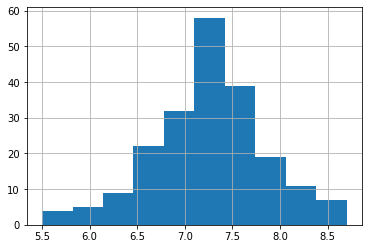

In [91]:
Shoujo['Оценка'].hist()

<AxesSubplot:>

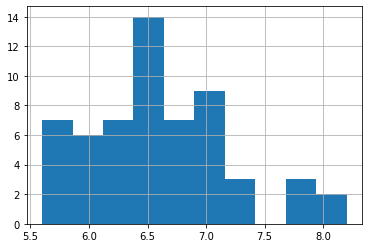

In [92]:
Kids['Оценка'].hist()

<AxesSubplot:>

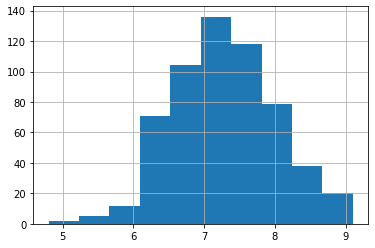

In [93]:
Shounen['Оценка'].hist()

In [94]:
Shoujo = Shoujo.reset_index()
Kids = Kids.reset_index()
Shounen = Shounen.reset_index()
Josei = Josei.reset_index()
Seinen = Seinen.reset_index()

Рассчитываем среднеквадратичное отклонение ручным способом

In [95]:
x = Shoujo['Оценка'][0]
mean = Shoujo['Оценка'].mean()
s_kv_otrl = Shoujo['Оценка'].std(ddof = 0)
print(x, mean, s_kv_otrl)

print('')

z_score = (x - mean) / s_kv_otrl
print(z_score)

8.0 7.23883495145631 0.6006845625057838

1.2671626608289288


Заливаем z-оценку во все датафреймы при помощи функции



In [96]:
Shoujo['z-score'] = scipy.stats.zscore(Shoujo['Оценка']) 
Kids['z-score'] = scipy.stats.zscore(Kids['Оценка']) 
Shounen['z-score'] = scipy.stats.zscore(Shounen['Оценка']) 
Josei['z-score'] = scipy.stats.zscore(Josei['Оценка']) 
Seinen['z-score'] = scipy.stats.zscore(Seinen['Оценка']) 

In [97]:
Shoujo

,index,Название,Демография,Врем_период,Оценка,z-score
0,97,Kaichou wa Maid-sama!,Shoujo,10-е,8.0,1.267163
1,118,Ouran Koukou Host Club,Shoujo,00-е,8.2,1.600116
2,127,Tonari no Kaibutsu-kun,Shoujo,10-е,7.5,0.434779
3,170,Ao Haru Ride,Shoujo,10-е,7.6,0.601256
4,171,Kimi ni Todoke,Shoujo,00-е,8.0,1.267163
...,...,...,...,...,...,...
201,10091,Chou Kuse ni Narisou,Shoujo,90-е,6.5,-1.229988
202,10165,Kiratto Pri☆chan Season 3,Shoujo,20-е,7.1,-0.231128
203,11124,Joou Heika no Petite Angie,Shoujo,70-е,6.3,-1.562942
204,11476,Anmitsu Hime,Shoujo,80-е,6.9,-0.564081


In [98]:
DF_anime_z_score = pd.concat([Shoujo, Kids, Shounen, Josei, Seinen])
DF_anime_z_score = DF_anime_z_score.drop(columns = ['index'], axis = 1)

<AxesSubplot:>

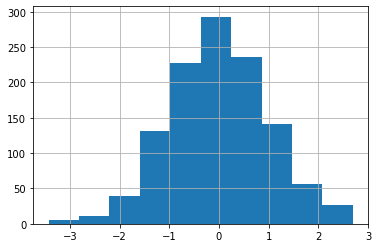

In [99]:
DF_anime_z_score['z-score'].hist()

Только у двух аниме из датафрейма оценка ниже, чем три стандартных отклонения. Видно, что у них аномально низкие оценки для своих временных периодов.



In [100]:
DF_anime_z_score[DF_anime_z_score['z-score'] < -3]

,Название,Демография,Врем_период,Оценка,z-score
467,Shoot! Goal to the Future,Shounen,20-е,4.8,-3.427218
33,Try Knights,Josei,10-е,4.7,-3.421190


Вывод - у жанров Shoujo и Shounen оценки чуть выше среднего, а у Seinen - значительно ниже среднего.



In [101]:
DF_anime_z_score.groupby('Демография')['z-score'].mean()

Демография
Josei     -1.349348e-15
Kids      -1.153292e-15
Seinen    -6.908054e-16
Shoujo     1.149027e-15
Shounen    1.624531e-16
Name: z-score, dtype: float64

## 4. Корреляция

#### Примечание! 
##### Ниже в 11 ячейках находится код, в котором я оставил в датафрейме только "чистые" жанры, то есть без смежных, и по которым я сделал корреляцию. Корреляция в данном случае отсутствовала, поэтому я всё переделал на основании уникальных значений тайтлов, т. е. взял всю выборку.

In [102]:
# themes_anime = DF_anime['Темы'].tolist()
# themes_anime_data = ', '.join(themes_anime)

In [103]:
# themes_anime_data = themes_anime_data.replace(' ', '')

In [104]:
# themes_anime_data = themes_anime_data.replace(',', ' ')

# list_themes = themes_anime_data.split()

# list_themes_unique = set(list_themes)
# list_themes_unique = list(list_themes_unique)

In [105]:
# for i in range(len(list_themes_unique)):
#     if list_themes_unique[i] in 'OrganizedCrime':
#         list_themes_unique[i] = 'Organized Crime'
#     elif list_themes_unique[i] in 'TeamSports':
#         list_themes_unique[i] = 'Team Sports'
#     elif list_themes_unique[i] in 'OtakuCulture':
#         list_themes_unique[i] = 'Otaku Culture'
#     elif list_themes_unique[i] in 'TimeTravel':
#         list_themes_unique[i] = 'Time Travel'
#     elif list_themes_unique[i] in 'CombatSports':
#         list_themes_unique[i] = 'Combat Sports'
#     elif list_themes_unique[i] in 'MagicalSexShift':
#         list_themes_unique[i] = 'Magical Sex Shift'
#     elif list_themes_unique[i] in 'AdultCast':
#         list_themes_unique[i] = 'Adult Cast'
#     elif list_themes_unique[i] in 'Idols(Male)':
#         list_themes_unique[i] = 'Idols_Male'
#     elif list_themes_unique[i] in 'MartialArts':
#         list_themes_unique[i] = 'Martial Arts'
#     elif list_themes_unique[i] in 'LovePolygon':
#         list_themes_unique[i] = 'Love Polygon'
#     elif list_themes_unique[i] in 'RomanticSubtext':
#         list_themes_unique[i] = 'Romantic Subtext'
#     elif list_themes_unique[i] in 'VisualArts':
#         list_themes_unique[i] = 'Visual Arts'
#     elif list_themes_unique[i] in 'StrategyGame':
#         list_themes_unique[i] = 'Strategy Game'
#     elif list_themes_unique[i] in 'Idols(Female)':
#         list_themes_unique[i] = 'Idols_Female'
#     elif list_themes_unique[i] in 'PerformingArts':
#         list_themes_unique[i] = 'Performing Arts'
#     elif list_themes_unique[i] in 'SuperPower':
#         list_themes_unique[i] = 'Super Power'
#     elif list_themes_unique[i] in 'GagHumor':
#         list_themes_unique[i] = 'Gag Humor'
#     elif list_themes_unique[i] in 'ReverseHarem':
#         list_themes_unique[i] = 'Reverse Harem'
#     elif list_themes_unique[i] in 'HighStakesGame':
#         list_themes_unique[i] = 'High Stakes Game'
#     elif list_themes_unique[i] in 'MahouShoujo':
#         list_themes_unique[i] = 'Mahou Shoujo'

In [106]:
# Organized_Crime = DF_anime[DF_anime['Темы'] == 'Organized Crime']
# Team_Sports = DF_anime[DF_anime['Темы'] == 'Team Sports']
# Otaku_Culture = DF_anime [DF_anime['Темы'] == 'Otaku Culture']
# Time_Travel = DF_anime [DF_anime ['Темы'] == 'Time Travel']
# Space = DF_anime [DF_anime ['Темы'] == 'Space']
# Pets = DF_anime [DF_anime ['Темы'] == 'Pets']
# Childcare = DF_anime [DF_anime ['Темы'] == 'Childcare']
# Combat_Sports = DF_anime [DF_anime ['Темы'] == 'Combat Sports']
# Magical_Sex_Shift = DF_anime [DF_anime ['Темы'] == 'Magical Sex Shift']
# Mythology = DF_anime [DF_anime ['Темы'] == 'Mythology']
# VideoGame = DF_anime [DF_anime ['Темы'] == 'VideoGame']
# Adult_Cast = DF_anime [DF_anime ['Темы'] == 'Adult Cast']
# Idols_Male = DF_anime [DF_anime ['Темы'] == 'Idols_Male']
# Martial_Arts = DF_anime [DF_anime['Темы'] == 'Martial Arts']
# Love_Polygon = DF_anime [DF_anime['Темы'] == 'Love Polygon']
# Harem = DF_anime [DF_anime['Темы'] == 'Harem']
# Crossdressing = DF_anime [DF_anime['Темы'] == 'Crossdressing']
# Racing = DF_anime [DF_anime['Темы'] == 'Racing']
# Medical = DF_anime [DF_anime['Темы'] == 'Medical']
# Detective = DF_anime [DF_anime['Темы'] == 'Detective']
# CGDCT = DF_anime [DF_anime['Темы'] == 'CGDCT']
# Delinquents = DF_anime [DF_anime['Темы'] == 'Delinquents']
# Romantic_Subtext = DF_anime [DF_anime['Темы'] == 'Romantic Subtext']
# Educational = DF_anime [DF_anime['Темы'] == 'Educational']
# Gore = DF_anime [DF_anime['Темы'] == 'Gore']
# Visual_Arts = DF_anime [DF_anime['Темы'] == 'Visual Arts']
# Strategy = DF_anime [DF_anime['Темы'] == 'Strategy']
# Workplace = DF_anime [DF_anime['Темы'] == 'Workplace']
# Showbiz = DF_anime [DF_anime['Темы'] == 'Showbiz']
# Vampire = DF_anime [DF_anime['Темы'] == 'Vampire']
# Iyashikei = DF_anime [DF_anime['Темы'] == 'Iyashikei']
# Mecha = DF_anime [DF_anime['Темы'] == 'Mecha']
# Idols_Female = DF_anime [DF_anime['Темы'] == 'Idols_Female']
# School = DF_anime [DF_anime['Темы'] == 'School']
# Military = DF_anime [DF_anime['Темы'] == 'Military']
# Samurai = DF_anime [DF_anime['Темы'] == 'Samurai']
# Psychological = DF_anime [DF_anime['Темы'] == 'Psychological']
# Performing_Arts = DF_anime [DF_anime['Темы'] == 'Performing Arts']
# Super_Power = DF_anime [DF_anime['Темы'] == 'Super Power']
# Anthropomorphic = DF_anime [DF_anime['Темы'] == 'Anthropomorphic']
# Gag_Humor = DF_anime [DF_anime['Темы'] == 'Gag Humor']
# Reverse_Harem = DF_anime [DF_anime['Темы'] == 'Reverse Harem']
# High_Stakes_Game = DF_anime [DF_anime['Темы'] == 'High Stakes Game']
# Isekai = DF_anime [DF_anime['Темы'] == 'Isekai']
# Mahou_Shoujo = DF_anime [DF_anime['Темы'] == 'Mahou Shoujo']
# Survival = DF_anime [DF_anime['Темы'] == 'Survival']
# Music = DF_anime [DF_anime['Темы'] == 'Music']
# Historical = DF_anime [DF_anime['Темы'] == 'Historical']
# Parody = DF_anime [DF_anime['Темы'] == 'Parody']
# Reincarnation = DF_anime [DF_anime['Темы'] == 'Reincarnation']

In [107]:
# DF_anime_corr = pd.concat([Organized_Crime, Team_Sports, Otaku_Culture, Time_Travel, Space, Pets, 
#                               Childcare, Combat_Sports, Magical_Sex_Shift, Mythology, VideoGame, Adult_Cast, 
#                               Idols_Male, Martial_Arts, Love_Polygon, Harem, Crossdressing, Racing, Medical, 
#                               Detective, CGDCT, Delinquents, Romantic_Subtext, Educational, Gore, 
#                               Visual_Arts, Strategy, Workplace, Showbiz, Vampire, Iyashikei, Mecha, 
#                               Idols_Female, School, Military, Samurai, Psychological, Performing_Arts, Super_Power, 
#                               Anthropomorphic, Gag_Humor, Reverse_Harem, High_Stakes_Game, Isekai, Mahou_Shoujo, Survival, 
#                               Music, Historical, Parody, Reincarnation])

In [108]:
# DF_anime_corr = DF_anime_corr.reset_index()
# DF_anime_corr = DF_anime_corr.drop(columns = ['index'], axis = 1)

In [109]:
# otsenka_corr_mean = DF_anime_corr.groupby('Темы')['Оценка'].mean()
# users_corr_sum = DF_anime_corr.groupby('Темы')['Оценивш._польз-ли'].sum()

In [110]:
# anime_corr_themes = pd.concat([otsenka_corr_mean, users_corr_sum], axis = 1)

In [111]:
# anime_corr_themes

In [112]:
# anime_corr_themes['Оценка'].corr(anime_corr_themes['Оценивш._польз-ли'])

Создаю датасет и график для поиска корреляции

In [113]:
anime_correlyatsiya = DF_anime[['Оценка', 'Оценивш._польз-ли', 'Члены_сообщества', 'В_избранных']]

In [114]:
anime_correlyatsiya.reset_index()

,index,Оценка,Оценивш._польз-ли,Члены_сообщества,В_избранных
0,0,8.5,519803,3524109,155695
1,1,8.6,485487,3504535,159701
2,2,9.1,900398,2978455,207772
3,3,8.5,19066,2879907,59651
4,5,7.9,871325,2708684,52169
...,...,...,...,...,...
1162,13075,6.3,133,673,3
1163,13131,5.5,144,662,1
1164,13452,5.6,223,592,0
1165,14660,5.7,119,406,0


<AxesSubplot:xlabel='Оценивш._польз-ли', ylabel='Оценка'>

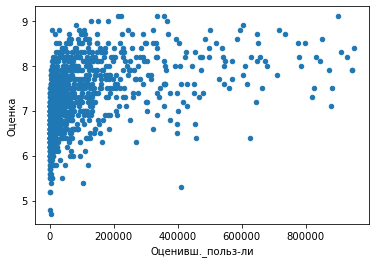

In [115]:
anime_correlyatsiya.plot('Оценивш._польз-ли', 'Оценка', kind = 'scatter')

Вывод - имеется невысокая корреляция.\
Очевидно, что наиболее высокооценённые аниме являются популярными, привлекая пользователей на свои страницы, однако наблюдается большое количество оценок аниме, поставленных небольшим количеством юзеров, что может говорить о том, что пользователи предрасположены ставить оценки в том числе непопулярным аниме.

In [116]:
anime_correlyatsiya.corr()

,Оценка,Оценивш._польз-ли,Члены_сообщества,В_избранных
Оценка,1.000000,0.418344,0.432931,0.364523
Оценивш._польз-ли,0.418344,1.000000,0.806281,0.532940
Члены_сообщества,0.432931,0.806281,1.000000,0.806516
В_избранных,0.364523,0.532940,0.806516,1.000000


Корреляция между "Членами сообщества" и "Добавившими в избранное" составляет 0.806516 и является ярко выраженной; интерпретируя, можно подчеркнуть, что с ростом членов сообщества, приверженнных орпределённому тайтлу, растёт также и количество человек, добавивших тайтл себе в избранное.

In [117]:
anime_corr = anime_correlyatsiya.corr()

In [118]:
anime_corr

,Оценка,Оценивш._польз-ли,Члены_сообщества,В_избранных
Оценка,1.000000,0.418344,0.432931,0.364523
Оценивш._польз-ли,0.418344,1.000000,0.806281,0.532940
Члены_сообщества,0.432931,0.806281,1.000000,0.806516
В_избранных,0.364523,0.532940,0.806516,1.000000


In [119]:
anime_corr.abs().unstack().sort_values(ascending = False)

Оценка             Оценка               1.000000
Оценивш._польз-ли  Оценивш._польз-ли    1.000000
Члены_сообщества   Члены_сообщества     1.000000
В_избранных        В_избранных          1.000000
Члены_сообщества   В_избранных          0.806516
В_избранных        Члены_сообщества     0.806516
Оценивш._польз-ли  Члены_сообщества     0.806281
Члены_сообщества   Оценивш._польз-ли    0.806281
Оценивш._польз-ли  В_избранных          0.532940
В_избранных        Оценивш._польз-ли    0.532940
Оценка             Члены_сообщества     0.432931
Члены_сообщества   Оценка               0.432931
Оценка             Оценивш._польз-ли    0.418344
Оценивш._польз-ли  Оценка               0.418344
Оценка             В_избранных          0.364523
В_избранных        Оценка               0.364523
dtype: float64

<AxesSubplot:xlabel='Оценивш._польз-ли', ylabel='Члены_сообщества'>

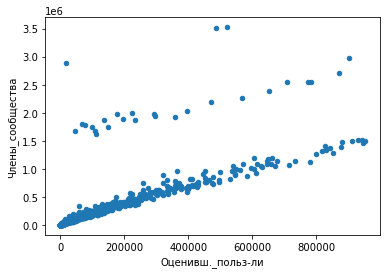

In [120]:
anime_correlyatsiya.plot('Оценивш._польз-ли', 'Члены_сообщества', kind = 'scatter')

Аналогично, видна яркая зависимость между количеством оценивших пользователей и членами сообщества определённого аниме; привлечённые активные члены сообщества также активно оценивают тайтлы.

## 5. Визуализация

In [121]:
DF_anime = DF_anime.drop(columns = ['для_выбросов'], axis = 1)

Привёл датасет в нормальный вид

In [122]:
DF_anime

,Название,Кол-во_эп.,Студия,Источник,Жанры,Темы,Демография,Рейтинг,Оценивш._польз-ли,Популярность,Члены_сообщества,В_избранных,Премьера_(месяц),Премьера_(год),Врем_период,Оценка,Оценка_(категория),Пол_ЦА
0,Shingeki no Kyojin,25.0,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,R - 17+ (violence & profanity),519803,1,3524109,155695,Spring,2013,10-е,8.5,Хорошо,Male
1,Death Note,37.0,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,R - 17+ (violence & profanity),485487,2,3504535,159701,Fall,2006,00-е,8.6,Хорошо,Male
2,Fullmetal Alchemist: Brotherhood,64.0,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,R - 17+ (violence & profanity),900398,3,2978455,207772,Spring,2009,00-е,9.1,Отлично,Male
3,One Punch Man,12.0,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,R - 17+ (violence & profanity),19066,4,2879907,59651,Fall,2015,10-е,8.5,Хорошо,Male
5,Boku no Hero Academia,13.0,Bones,Manga,Action,"School, Super Power",Shounen,PG-13 - Teens 13 or older,871325,6,2708684,52169,Spring,2016,10-е,7.9,Хорошо,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,Super Zugan,21.0,Studio Deen,Manga,Comedy,Strategy Game,Shounen,PG-13 - Teens 13 or older,133,13089,673,3,Fall,1992,90-е,6.3,Посредственно,Male
13131,Doctor Chichibuyama,2.0,Production Reed,4-koma manga,"Comedy, Ecchi",Parody,Seinen,R+ - Mild Nudity,144,13145,662,1,Spring,1988,80-е,5.5,Посредственно,Male
13452,Hei Mao Jing Zhang,5.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,223,13469,592,0,Winter,1984,80-е,5.6,Посредственно,All
14660,Hei Mao Jing Zhang (1992),12.0,Shanghai Animation Film Studio,Original,"Action, Adventure, Comedy","Detective, Racing",Kids,PG - Children,119,14681,406,0,Winter,1992,90-е,5.7,Посредственно,All


Создал отдельную переменную для графика; сгруппировал год выхода аниме и их среднюю оценку.

In [123]:
df_otsenki_mean = DF_anime.groupby('Премьера_(год)')['Оценка'].mean()

In [124]:
df_otsenki_mean

Премьера_(год)
1963    6.750000
1964    6.000000
1967    6.666667
1968    6.600000
1969    7.300000
1970    7.550000
1971    7.600000
1973    6.600000
1974    6.850000
1975    6.800000
1976    6.350000
1977    7.057143
1978    7.050000
1979    7.766667
1980    7.733333
1981    6.766667
1982    7.100000
1983    6.925000
1984    6.755556
1985    7.242857
1986    7.300000
1987    7.100000
1988    6.800000
1989    7.475000
1990    7.300000
1991    7.162500
1992    7.062500
1993    7.560000
1994    7.100000
1995    7.266667
1996    7.341176
1997    7.207692
1998    7.120000
1999    7.186667
2000    7.215789
2001    7.340000
2002    6.820690
2003    7.100000
2004    7.138636
2005    7.233333
2006    7.328571
2007    7.454286
2008    7.397436
2009    7.500000
2010    7.368571
2011    7.262791
2012    7.345000
2013    7.215909
2014    7.276923
2015    7.352830
2016    7.203448
2017    7.321739
2018    7.381481
2019    7.294915
2020    7.370270
2021    7.363043
2022    7.337500
Name: Оценка, dt

Видно, что, за исключением нескольких аномальных пиков в 1970-х, средняя оценка аниме с течением лет стабильно растёт.


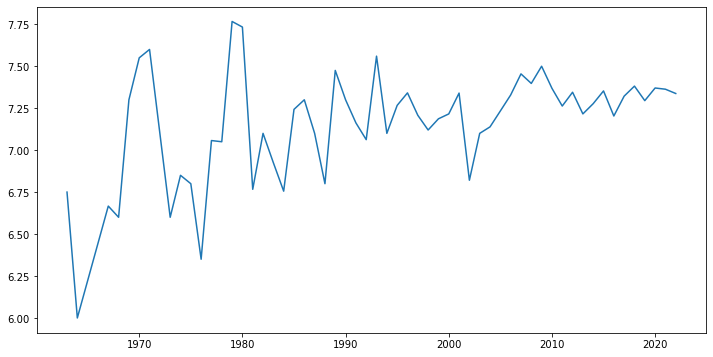

In [125]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(df_otsenki_mean)